We have daily female births, in  california(1960) data. We will use time series porphet predition mode to estimate the future events of this data.

Importing packages and loading data. 

In [20]:
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt

df = pd.read_csv("../input/dailytotalfemalebirths/daily-total-female-births-CA.csv")
df.columns = ['ds', 'y']
df.head()


,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


let us visualize and data and see what is happening.

Text(0.5, 1.0, 'Daily Female Births in 1959')

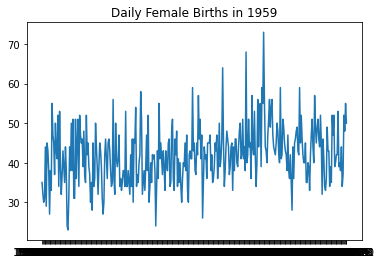

In [21]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')

Let us identify the seasonality effects.

In [33]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False, 
                          changepoint_range=0.9, 
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df)
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

let us visualize the seasonality effect.

/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


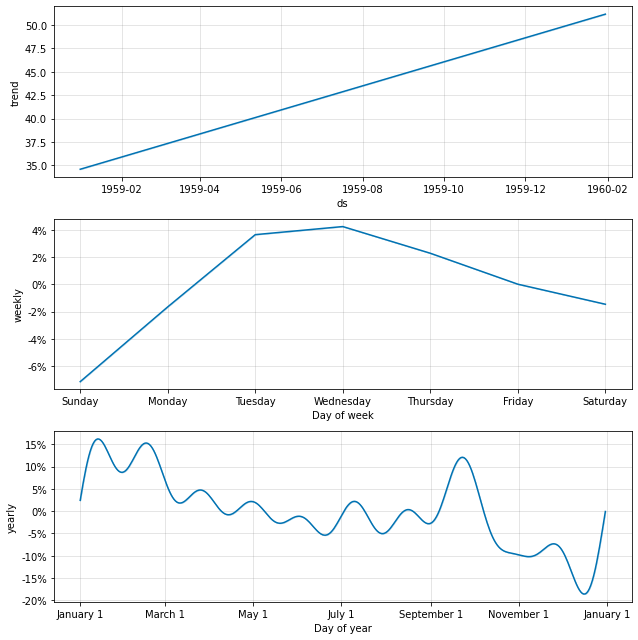

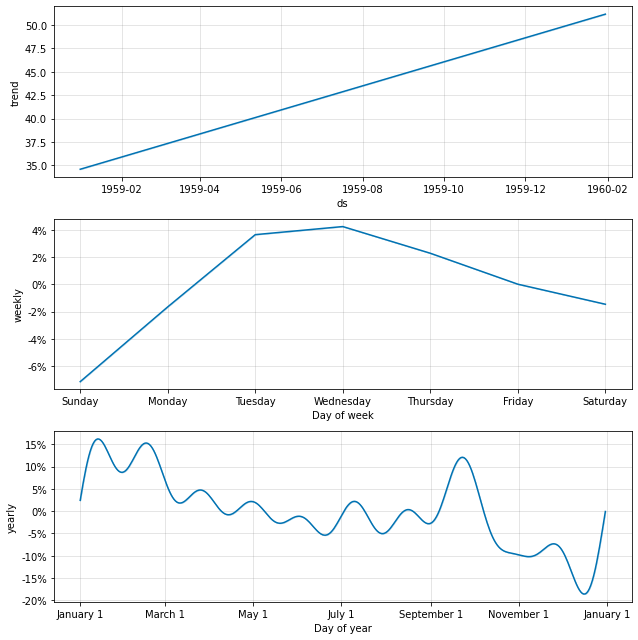

In [34]:
m.plot_components(forecast)

let us see the prediction made by the model.

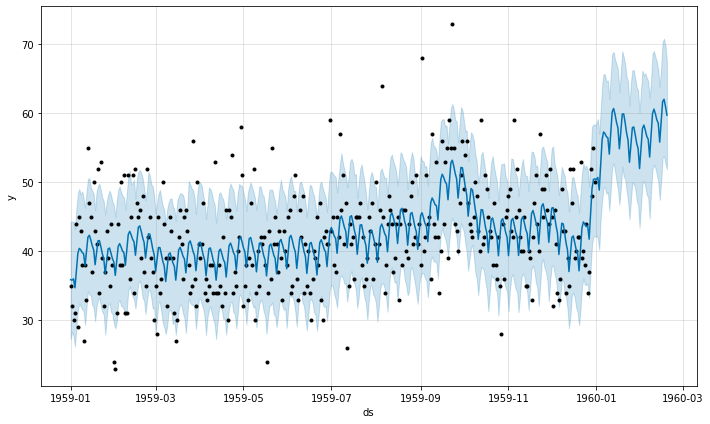

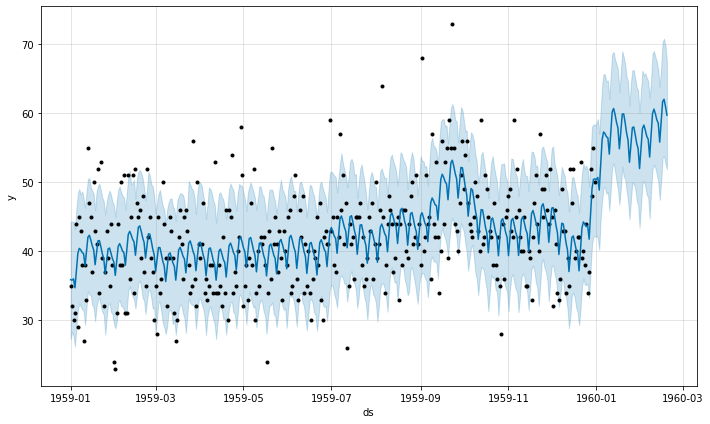

In [24]:
m.plot(forecast)

The model predicts a sharp raise in female polulation, in the next two months.